In [1]:
import pandas as pd
import datetime as dt

In [6]:
fi_data=pd.read_csv('aviation-occurrence-repo.csv',header=0)

In [23]:
se_data=pd.DataFrame([{'year':'2023','incidents':55,'year_days':365},
                      {'year':'2024','incidents':495,'year_days':366},
                      {'year':'2025','incidents':733,'year_days':120}],
                     index=[0,1,2])

<Axes: xlabel='year'>

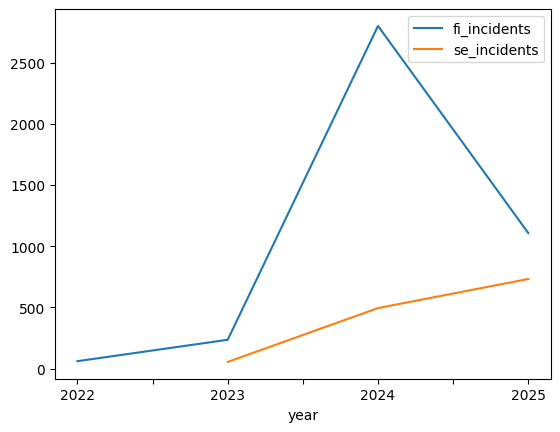

In [27]:
(fi_data
    .rename(columns={'2024*':'2024'})
    .sum(numeric_only=True)
    .reset_index()
    .rename(columns={'index':'year',0:'fi_incidents'})
    .set_index('year')
 .merge(se_data
     .set_index('year')
    #.assign(disturbances_Sweden_weighted=se_data.set_index('year').incidents.div(se_data.set_index('year').year_days)*365)
    .drop(columns='year_days')
    .rename(columns={'incidents':'se_incidents'}),
    left_index=True, right_index=True,how='outer')
.plot()
)